In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [11]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
# Сколько уникальных значений принимает переменная platform?

logs.platform.nunique()

3

In [69]:
# Какой клиент совершил больше всего успешных операций?

clients_success = logs.query('success == True') \
    .client.value_counts() \
    .reset_index() \
    .rename(columns = { \
    'index': 'client',
    'client': 'total_success'})

max_success_value = clients_success.total_success.max() #41

good_client = clients_success.query('total_success == @max_success_value') \
    .sort_values('client')
answer = good_client.client
answer

2    12179
5    28719
0    36165
7    52870
1    61468
3    61473
4    78349
8    82563
6    92584
Name: client, dtype: int64

In [50]:
# С какой платформы осуществляется наибольшее количество успешных операций?¶
logs.query('success == True').platform.value_counts().idxmax()

'phone'

In [9]:
data = user_data.merge(logs, on = 'client', how = 'inner')
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [10]:
# Какая платформа наиболее популярна среди премиумных клиентов?
data.query('premium == True') \
    .platform \
    .value_counts() \
    .idxmax()

'phone'

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


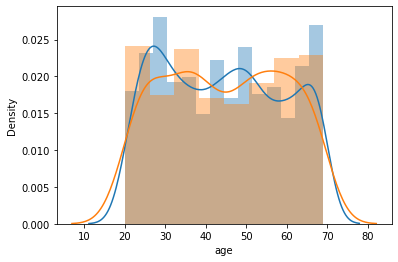

In [11]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум),
# используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?
# Используйте датасет, который вы получили на предыдущем шаге

premium_clients = data.query('premium == True')
ordinary_clients = data.query('premium == False')
sns.distplot(ordinary_clients.age)
sns.distplot(premium_clients.age)

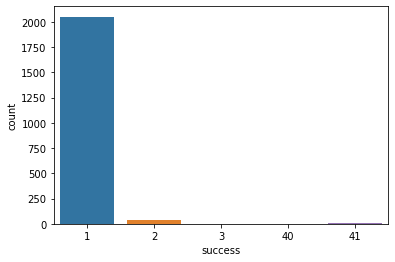

In [12]:
# Постройте график распределения числа успешных операций

success_op = data.query('success == True').success.value_counts()
total_suc_clients = data.query('success == True').groupby(['client'], as_index = False).agg({'success': 'sum'})
sns.countplot(x = total_suc_clients.success)

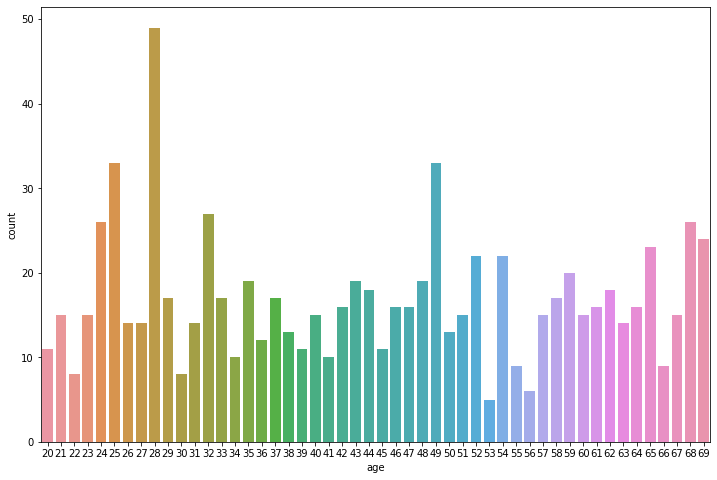

In [13]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста,
# используя sns.countplot. По оси x – возраст, y – число успешных операций.
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.
# Клиенты какого возраста совершили наибольшее количество успешных действий?
comp_success = data.query('platform == "computer" & success == True')
plt.figure(figsize=(12, 8))
sns.countplot(x = comp_success.age)

In [162]:
df.head()

,subs_id
0,id4651830
1,id7646509
2,id7412683
0,id5416547
2,id8362218


In [159]:
pd.to_datetime(df['start_dttm'])

0   2020-03-20 14:59:00
1   2020-03-19 13:00:00
2   2020-03-17 10:17:00
3   2020-03-16 16:28:00
4   2020-03-15 14:21:00
Name: start_dttm, dtype: datetime64[ns]

In [74]:
data = data.rename(columns = lambda col: col.lower())